In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [58]:
font = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 16} 
import matplotlib
matplotlib.rc('font', **font) 
import matplotlib.pyplot as plt
import pylab
import math
import sys
import numpy as np
from scipy import ndimage
from astropy.cosmology import FlatLambdaCDM

#np.set_printoptions(threshold=sys.maxsize)
#from power_spectrum import Lens
from lens import Lens
from binning import Binning
#from lens_g import Lens

In [59]:
name = 'abell2744_mass_density'
#name = 'hlsp_frontier_model_abell2744_cats_v4.1_kappa'

In [110]:
#binning = Binning(1001, method='experimental', R=100, n=24, m=26)
binning = Binning(1001, method='slicer', side_length=1000, min1=100, min2=10000)
abell = Lens(f'data/{name}.fits', binning)
#abell = Lens(f'data/{name}.fits')
nr, kbin_centers, power = abell.compute_power_spectrum()
theta_bin_centers = 1.0/kbin_centers
sig_power = power/(np.sqrt(0.5*nr))

{'side_length': 1000, 'min1': 100, 'min2': 10000}


Shape: (1000, 1000)
Arsecs per pixel: 1.0010010010010004
Side length: 1001.0010010010003 (arcsec)
Max angular radius: 707.8145957823293
FOV: 2.3551510007603046e-05 (steradians)


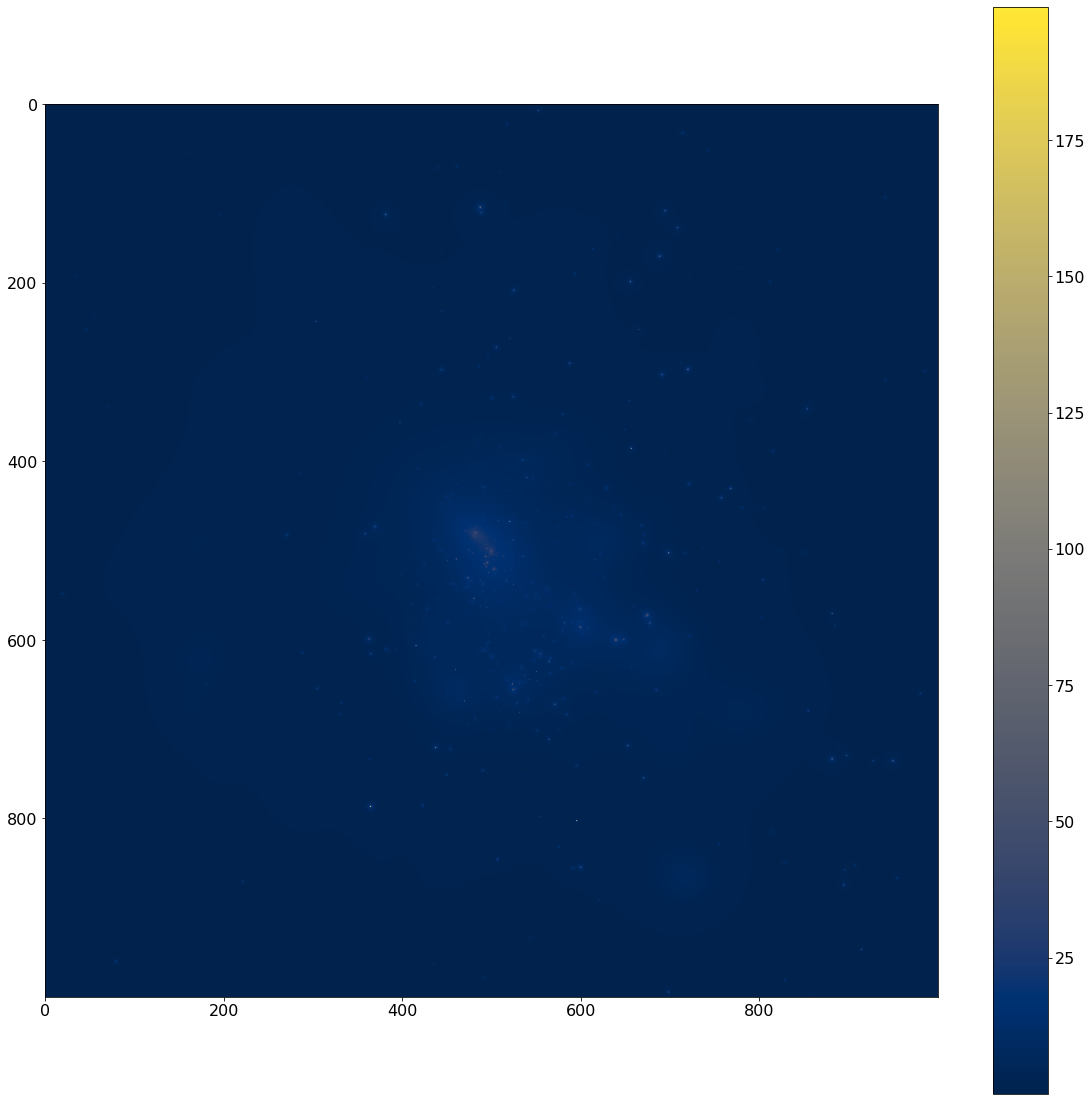

In [31]:
abell.print_info()
abell.preview_mass_map()

In [38]:
abell.print_info()

Shape: (1000, 1000)
Arsecs per pixel: 1.0010010010010004
Side length: 1001.0010010010003 (arcsec)
Max angular radius: 707.8145957823293
FOV: 2.3551510007603046e-05 (steradians)


In [39]:
print(kbin_centers)

[0.00158178 0.00354002 0.00493741 0.00573408 0.00665922 0.00773351
 0.00898095 0.01042939 0.01211115 0.01406371 0.01633055 0.01896206
 0.02201668 0.02556211 0.02967676 0.03445144 0.03999121 0.0464176
 0.05387106 0.0625138  0.07876548 0.11562651 0.2170092 ]


In [94]:
print(theta_bin_centers)

[7.07000707e+02 3.09133107e+02 2.57356340e+02 2.26849771e+02
 1.99959397e+02 1.76256560e+02 1.55363417e+02 1.36946910e+02
 1.20713463e+02 1.06404301e+02 9.37913214e+01 8.26734626e+01
 7.28734953e+01 6.42351989e+01 5.66208710e+01 4.99091322e+01
 4.39929912e+01 3.87781391e+01 3.41814465e+01 3.01296377e+01
 2.65581233e+01 2.34099699e+01 2.06349931e+01 1.81889572e+01
 1.60328701e+01 1.41323618e+01 1.24571364e+01 1.09804893e+01
 9.67888134e+00 8.53156371e+00 7.52024710e+00 6.62881019e+00
 5.84304265e+00 5.15041862e+00 4.53989703e+00 4.00174559e+00
 3.52738568e+00 3.10925557e+00 2.74068986e+00 2.41581329e+00
 2.12944702e+00 1.87702610e+00 1.65452672e+00 1.45840202e+00
 1.28552560e+00 1.13314165e+00 9.98821026e-01 8.80422532e-01
 7.76058789e-01 6.84066140e-01]


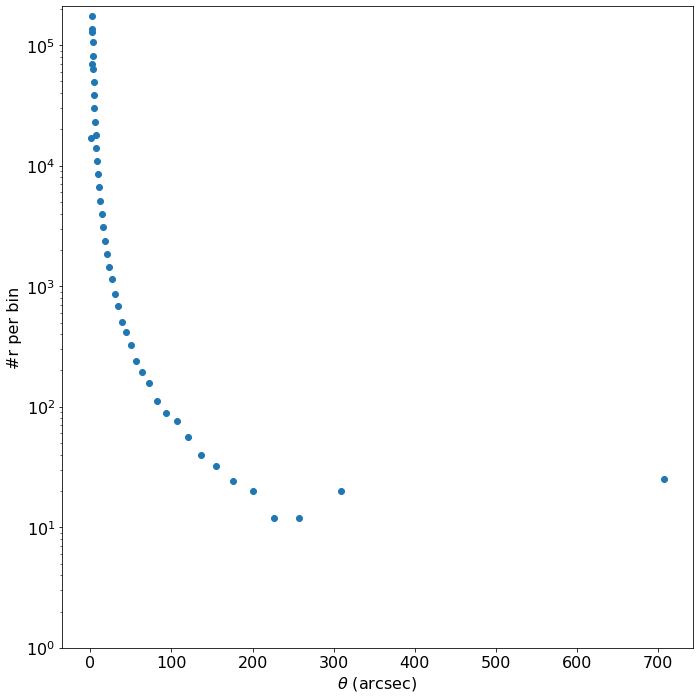

In [87]:
abell.make_bin_info_plot()

In [111]:
abell.print_bin_info()

1.5409: 10008	1.5850: 10000	1.6212: 9996	1.6531: 10000	1.6822: 10004	1.7093: 10000	1.7348: 10000	1.7591: 10000	1.7822: 9996	1.8043: 10000	1.8256: 10004	1.8462: 10000	1.8661: 10004	1.8853: 9992	1.9039: 10000	1.9219: 10000	1.9392: 10016	1.9559: 9988	1.9719: 10000	1.9871: 9996	2.0011: 10002	2.0142: 10004	2.0274: 10000	2.0407: 10016	2.0543: 9980	2.0683: 10004	2.0825: 10008	2.0970: 10000	2.1118: 9992	2.1268: 10000	2.1423: 9996	2.1582: 10040	2.1743: 9968	2.1907: 9992	2.2076: 10008	2.2249: 10016	2.2426: 9976	2.2607: 10012	2.2793: 9988	2.2984: 10004	2.3179: 9996	2.3380: 10004	2.3586: 10028	2.3797: 9968	2.4013: 10004	2.4236: 10000	2.4466: 10004	2.4702: 9992	2.4945: 10012	2.5195: 9996	2.5454: 9996	2.5720: 10004	2.5994: 10028	2.6277: 9992	2.6570: 9972	2.6874: 10004	2.7188: 9996	2.7512: 10008	2.7849: 9996	2.8197: 10000	2.8561: 9996	2.8940: 10004	2.9331: 10000	2.9741: 10020	3.0168: 9980	3.0613: 10008	3.1079: 9996	3.1568: 9992	3.2080: 10004	3.2620: 10008	3.3184: 9988	3.3779: 10000	3.4410: 10004	3.50

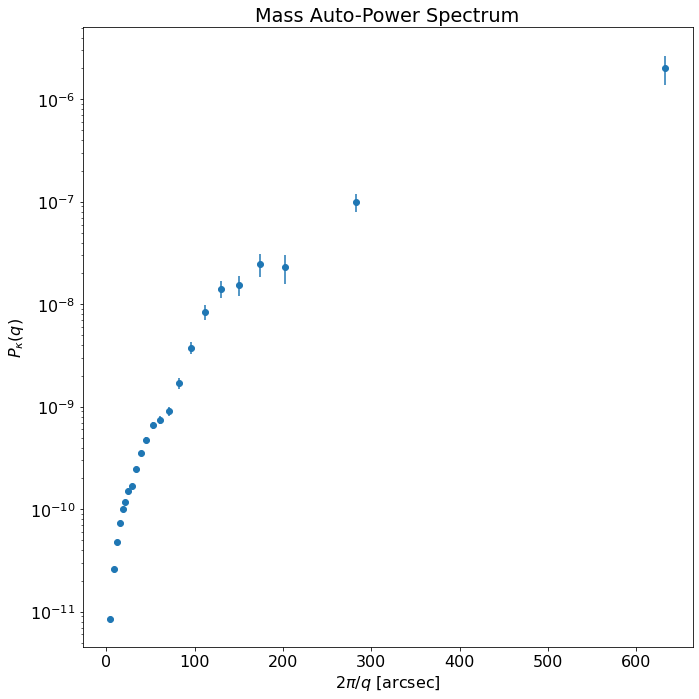

In [43]:
abell.make_power_spectrum_linear_bar_plot()

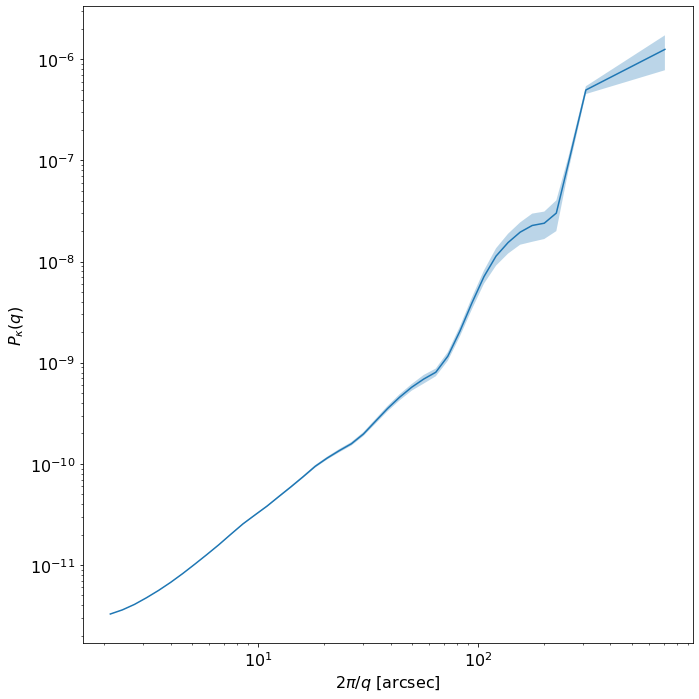

In [83]:
abell.make_power_spectrum_plot()

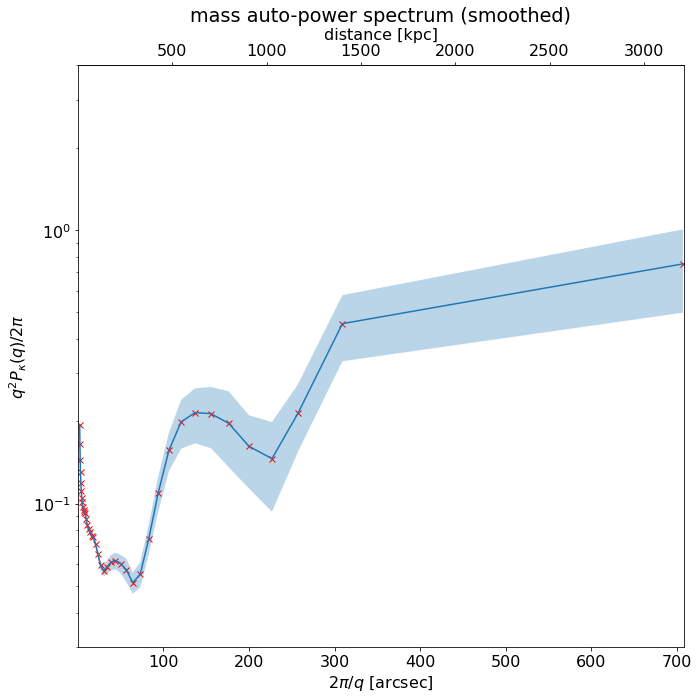

In [84]:
abell.make_power_spectrum_q2_plot()

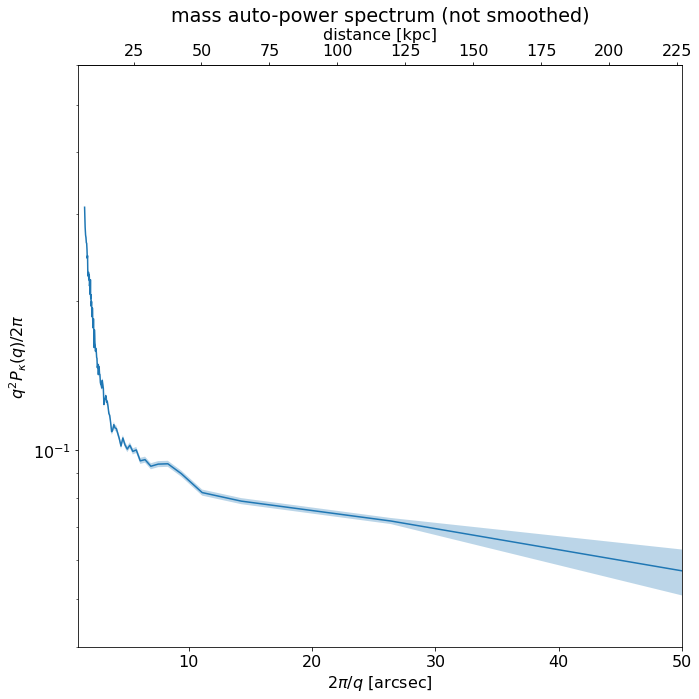

In [114]:
abell.make_power_spectrum_q2_plot(smooth=False, xlimits=(1, 50), ylimits=(0.04, 0.6), outfile="output/abell2744_ps_q2_slicer")